In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)
library(stringr)

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_clogit_platform/'

In [3]:
### clean features
fts = c('PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr', 
        'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr', 
        'PLIp9_cds + PLIp9_utr', 
        'LOWPLI_cds + LOWPLI_utr',

        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron')
fts_labels = c('fetal brain expressed genes with pLI≥.9, exonic', 
               'fetal brain expressed genes, exonic', 
               'pLI≥.9, exonic', 
               'pLI≤.9, exonic',

               'fetal brain expressed genes with pLI≥.9, intronic',
               'fetal brain expressed genes, intronic', 
               'pLI≥.9, intronic', 
               'pLI≤.9, intronic')
fts_col_names = c('fetal_brain_genes_pli_exonic', 
                  'fetal_brain_genes_exonic', 
                  'pli_genes_exonic', 
                  'lowpli_genes_exonic', 
                  'fetal_brain_genes_pli_intronic', 
                  'fetal_brain_genes_intronic', 
                  'pli_genes_intronic', 
                  'lowpli_genes_intronic')

trs_fts = c(fts, 
            'FDR_ASD_cds + FDR_ASD_utr', 
            'FDR_ASD_intron')
trs_fts_labels = c(fts_labels, 
                   'ASD FDR, exonic',
                   'ASD FDR, intron')
trs_fts_col_names = c(fts_col_names, 
                      'asd_genes_exonic', 
                      'asd_genes_intronic')

In [4]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

In [5]:
#prs_mode = 'sbayesr'
prs_mode = 'prscs'
if (prs_mode == 'sbayesr') {
    file_main = 'combined_svs_trs_snvs_prs_pc_sbayesr.csv'
} else if (prs_mode == 'prscs') {
    file_main = 'combined_svs_trs_snvs_prs_pc_prscs.csv'}
df_main <- read.table(file_main, header = TRUE, sep = ",")
#df_main['count_PLIp9_nonLOF_DEV_BR_10_cds'] = df_main[,'count_PLIp9_DEV_BR_GENE_10_cds'] - df_main[,'count_PLIp9_LOF_DEV_BR_10_cds']
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
df_main

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,142,126,16,14,0,0,-0.971701072,-0.510485305,0.82162924,0
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,1,1,1,1,1,1,0.303644763,0.817056455,0.06312390,1
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,5,5,1,1,1,1,0.595643472,-0.305436874,1.94303491,2
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,0,0,0,1.166191828,0.943709479,-2.78896425,1
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,2,1,1,0,0,0,0.703902177,-0.152554399,0.06482359,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,1,0,0,0,0,0,0.384605619,0.209070495,0.16440487,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,3,3,2,2,1,1,-0.898010204,-0.994547648,0.53088874,1
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,1,1,1,1,1,1,-1.036073363,-1.487948561,0.29231934,1
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,3,2,2,1,1,1,0.817923575,-0.003587407,-0.08546761,1


In [6]:
df_main_ont = df_main %>% filter(Platform == 'ONT')
df_main_pb = df_main %>% filter(Platform == 'PB')

print('ont:')
df_main_ont
print('pb:')
df_main_pb

[1] "ont:"


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,142,126,16,14,0,0,-0.9717011,-0.51048531,0.8216292,0
F0125,REACH000154,ASD,Male,1,trio,1,1,0.007652076,-0.005627826,⋯,199,169,14,10,2,1,0.3607304,-0.32076299,0.8185469,0
F0203,REACH000400,ASD,Male,1,trio,3,0,0.063124600,0.025317490,⋯,110,91,11,10,5,4,-0.6247403,-0.17599014,-0.6115019,0
F0203,REACH000403,ASD,Male,1,trio,3,0,0.072212100,0.029487000,⋯,97,76,11,7,4,3,0.3230231,-0.64543372,-1.2073623,1
F0203,REACH000404,ASD,Female,1,trio,3,0,0.051612690,0.017961540,⋯,138,111,7,5,3,3,0.2809687,-0.53408538,-0.6083169,1
F0205,REACH000409,ASD,Female,1,trio,1,0,0.072176330,-0.020434790,⋯,171,142,20,17,3,3,-1.2335789,-0.69156212,0.4613373,0
F0205,REACH000412,CON,Female,1,trio,1,0,0.073046370,-0.018088850,⋯,198,173,20,18,7,6,-0.9390153,-0.16585847,-0.5141728,0
F0205,REACH000413,CON,Female,1,trio,1,0,0.065685740,-0.016456620,⋯,208,168,20,16,0,0,0.9566446,-0.54192349,0.4957055,0
F0206,REACH000414,ASD,Male,1,trio,1,0,0.023306320,0.008190642,⋯,232,180,16,13,1,1,-1.0187436,-0.03057423,0.9589418,0


[1] "pb:"


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,1,1,1,1,1,1,0.303644763,0.817056455,0.06312390,1
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,5,5,1,1,1,1,0.595643472,-0.305436874,1.94303491,2
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,0,0,0,1.166191828,0.943709479,-2.78896425,1
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,2,1,1,0,0,0,0.703902177,-0.152554399,0.06482359,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,1,0,0,0,0,0,0.384605619,0.209070495,0.16440487,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,3,3,2,2,1,1,-0.898010204,-0.994547648,0.53088874,1
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,1,1,1,1,1,1,-1.036073363,-1.487948561,0.29231934,1
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,3,2,2,1,1,1,0.817923575,-0.003587407,-0.08546761,1
F0101,REACH000120,ASD,Male,1,trio,1,1,-0.008356654,-0.006733101,⋯,0,0,0,0,0,0,-0.601781078,-0.226955727,-0.49511091,0


In [7]:
# TR settings
#PRINT_INFO = TRUE
PRINT_INFO = FALSE

zs_thr = 3
#supp_thr = 2
supp_thr = 3
q_suf = '_Q'

In [8]:
### TRs ALL

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = trs_fts, 'fts_labels' = trs_fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

[1] "no extra covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_cds_SUPP3_Q" "count_ZS3_PLIp9_utr_SUPP3_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP3_Q" "count_ZS3_LOWPLI_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_intron_SUPP3_Q"
[1] "count_ZS3_PLIp9_intron_SUPP3_Q"
[1] "count_ZS3_LOWPLI_intron_SUPP3_Q"
[1] "count_ZS3_FDR_ASD_cds_SUPP3_Q" "count_ZS3_FDR_ASD_utr_SUPP3_Q"
[1] "count_ZS3_FDR_ASD_intron_SUPP3_Q"
[1] "with LOF-SNV and PRS covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_cds_SUPP3_Q" "count_ZS3_PLIp9_utr_SUPP3_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP3_Q" "count_ZS3_LO

In [9]:
### TRs ONT

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data_all_ont = cbind(my_data, data.frame('log_ORs_comb_ont' = log_ORs, 'log_ORs_plus_comb_ont' = log_ORs_plus, 'log_ORs_minus_comb_ont' = log_ORs_minus, 
                     'ano_pval_comb_ont' = ano_pvals, 
                     'sum_case_con_comb_ont' = sum_case_controls, 
                     'log_ORs_ncar_ont' = log_ORs_ncar, 'log_ORs_plus_ncar_ont' = log_ORs_plus_ncar, 'log_ORs_minus_ncar_ont' = log_ORs_minus_ncar, 
                     'ano_pval_ncar_ont' = ano_pvals_ncar, 
                     'sum_case_con_ncar_ont' = sum_case_controls_ncar))
#print(my_data)

[1] "no extra covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_cds_SUPP3_Q" "count_ZS3_PLIp9_utr_SUPP3_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP3_Q" "count_ZS3_LOWPLI_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_intron_SUPP3_Q"
[1] "count_ZS3_PLIp9_intron_SUPP3_Q"
[1] "count_ZS3_LOWPLI_intron_SUPP3_Q"
[1] "count_ZS3_FDR_ASD_cds_SUPP3_Q" "count_ZS3_FDR_ASD_utr_SUPP3_Q"
[1] "count_ZS3_FDR_ASD_intron_SUPP3_Q"
[1] "with LOF-SNV and PRS covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_cds_SUPP3_Q" "count_ZS3_PLIp9_utr_SUPP3_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP3_Q" "count_ZS3_LO

In [10]:
### TRs PB

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data_all_ont_pb = cbind(my_data_all_ont, data.frame('log_ORs_comb_pb' = log_ORs, 'log_ORs_plus_comb_pb' = log_ORs_plus, 'log_ORs_minus_comb_pb' = log_ORs_minus, 
                     'ano_pval_comb_pb' = ano_pvals, 
                     'sum_case_con_comb_pb' = sum_case_controls, 
                     'log_ORs_ncar_pb' = log_ORs_ncar, 'log_ORs_plus_ncar_pb' = log_ORs_plus_ncar, 'log_ORs_minus_ncar_pb' = log_ORs_minus_ncar, 
                     'ano_pval_ncar_pb' = ano_pvals_ncar, 
                     'sum_case_con_ncar_pb' = sum_case_controls_ncar))

[1] "no extra covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_cds_SUPP3_Q" "count_ZS3_PLIp9_utr_SUPP3_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP3_Q" "count_ZS3_LOWPLI_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_intron_SUPP3_Q"
[1] "count_ZS3_PLIp9_intron_SUPP3_Q"
[1] "count_ZS3_LOWPLI_intron_SUPP3_Q"
[1] "count_ZS3_FDR_ASD_cds_SUPP3_Q" "count_ZS3_FDR_ASD_utr_SUPP3_Q"
[1] "count_ZS3_FDR_ASD_intron_SUPP3_Q"
[1] "with LOF-SNV and PRS covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3_Q"
[1] "count_ZS3_PLIp9_cds_SUPP3_Q" "count_ZS3_PLIp9_utr_SUPP3_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP3_Q" "count_ZS3_LO

[1] "R_clogit_platform/TRs_devBrainPLI_ZS3_SUPP3_Q.png"
[1] "R_clogit_platform/TRs_devBrain_ZS3_SUPP3_Q.png"


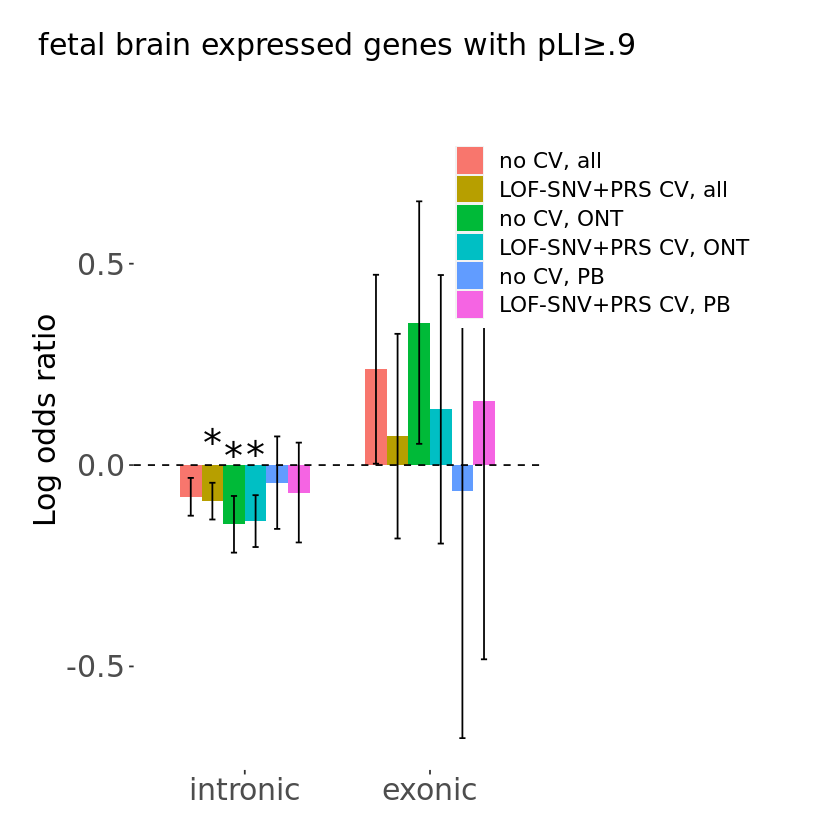

[1] "R_clogit_platform/TRs_PLI_ZS3_SUPP3_Q.png"


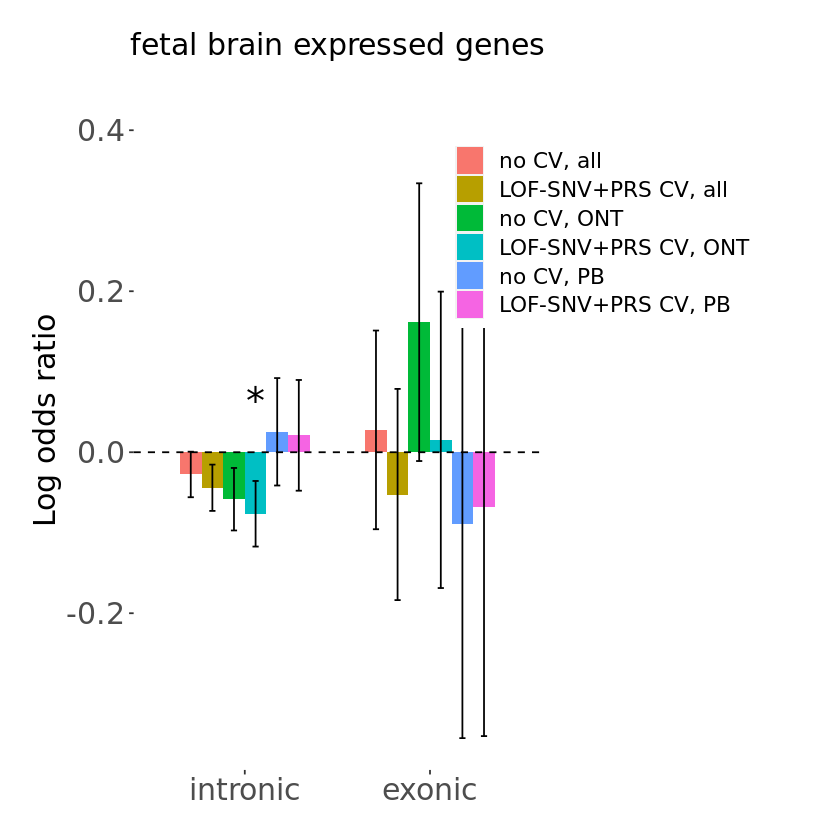

[1] "R_clogit_platform/TRs_LOWPLI_ZS3_SUPP3_Q.png"


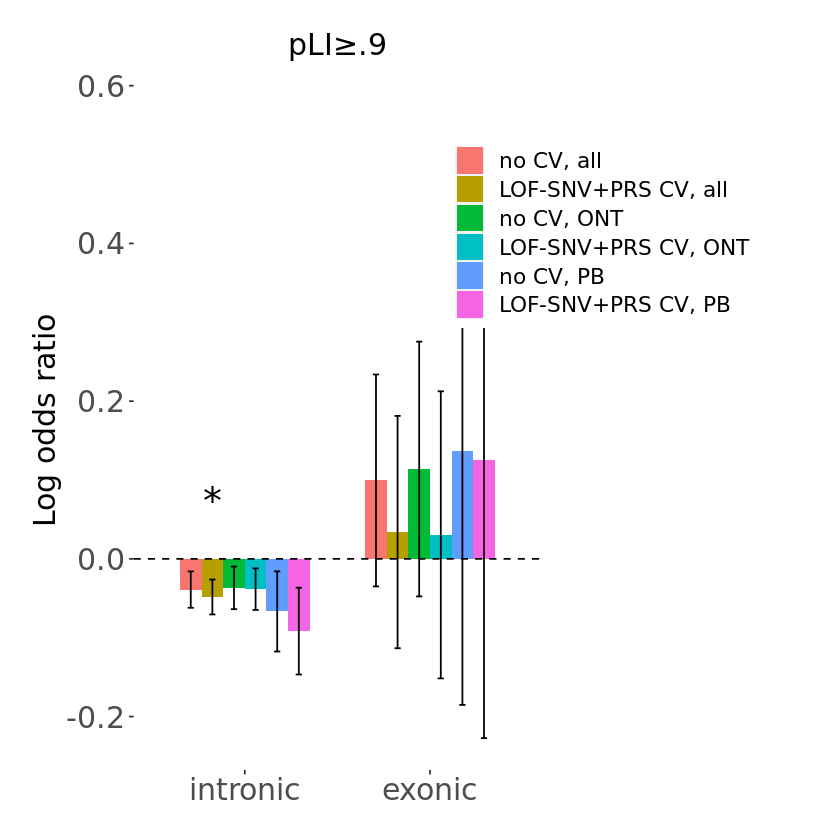

[1] "R_clogit_platform/TRs_FDR_ASD_ZS3_SUPP3_Q.png"


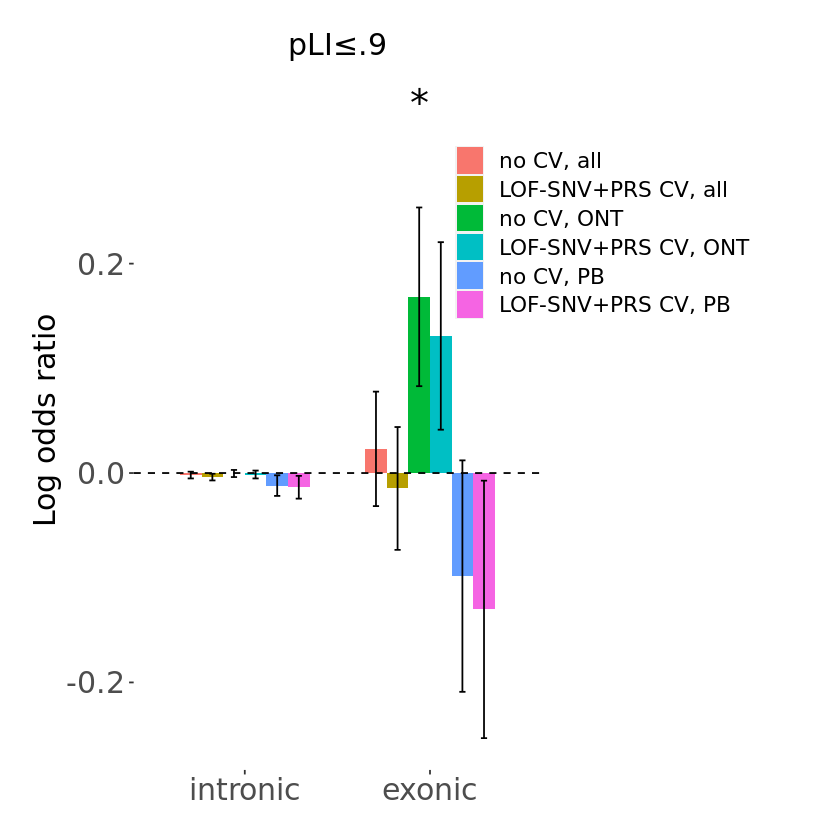

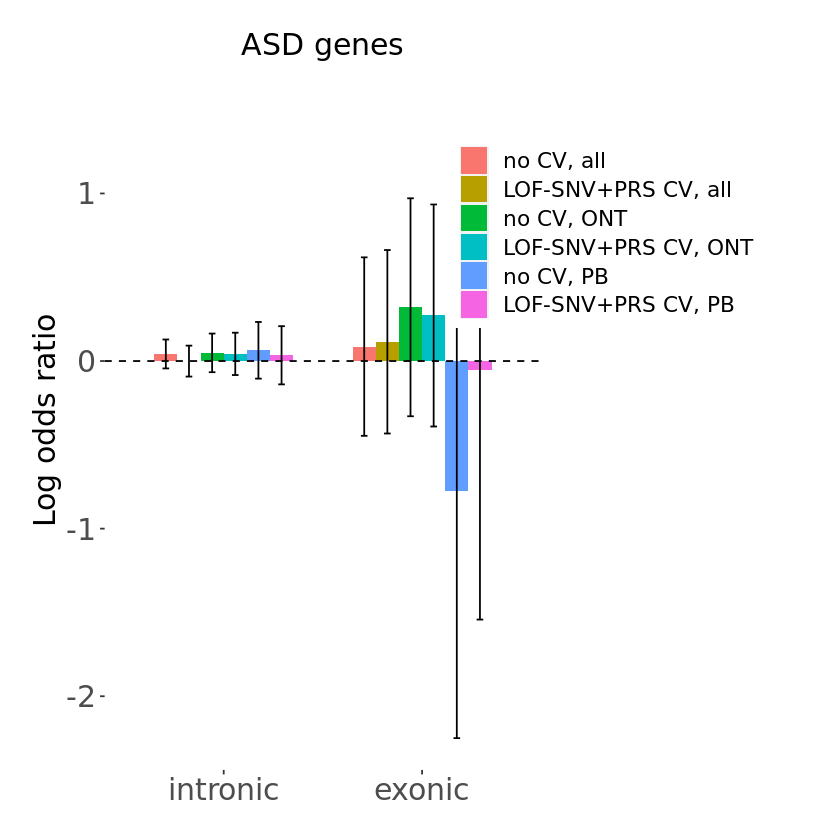

In [11]:
# plot TRs
sub_fts_labels = c('intronic', 'exonic')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_cds + FDR_ASD_utr')
title_5 = 'ASD genes'
fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
title_list = list(title_1, title_2, title_3, title_4, title_5)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'TRs_', fig_base, '_ZS', zs_thr, '_SUPP', supp_thr, q_suf, ".png")

    my_data_sub = my_data_all_ont_pb[my_data_all_ont_pb$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar',
                                                     'log_ORs_plus_comb_ont', 'log_ORs_minus_comb_ont', 
                                                     'ano_pval_comb_ont', 
                                                     'sum_case_con_comb_ont', 
                                                     'log_ORs_plus_ncar_ont', 'log_ORs_minus_ncar_ont', 
                                                     'ano_pval_ncar_ont', 
                                                     'sum_case_con_ncar_ont',
                                                     'log_ORs_plus_comb_pb', 'log_ORs_minus_comb_pb', 
                                                     'ano_pval_comb_pb', 
                                                     'sum_case_con_comb_pb', 
                                                     'log_ORs_plus_ncar_pb', 'log_ORs_minus_ncar_pb', 
                                                     'ano_pval_ncar_pb', 
                                                     'sum_case_con_ncar_pb'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, 
                                                                          ifelse(comb_ncar=='log_ORs_ncar', log_ORs_plus_ncar, 
                                                                                 ifelse(comb_ncar=='log_ORs_comb_ont', log_ORs_plus_comb_ont, 
                                                                                        ifelse(comb_ncar=='log_ORs_ncar_ont', log_ORs_plus_ncar_ont, 
                                                                                               ifelse(comb_ncar=='log_ORs_comb_pb', log_ORs_plus_comb_pb, 
                                                                                                      ifelse(comb_ncar=='log_ORs_ncar_pb', log_ORs_plus_ncar_pb, '.')))))))
    my_data_sub.melt[,'log_ORs_plus'] <- as.double(my_data_sub.melt[,'log_ORs_plus'])
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, 
                                                                          ifelse(comb_ncar=='log_ORs_ncar', log_ORs_minus_ncar, 
                                                                                 ifelse(comb_ncar=='log_ORs_comb_ont', log_ORs_minus_comb_ont, 
                                                                                        ifelse(comb_ncar=='log_ORs_ncar_ont', log_ORs_minus_ncar_ont, 
                                                                                              ifelse(comb_ncar=='log_ORs_comb_pb', log_ORs_minus_comb_pb, 
                                                                                                      ifelse(comb_ncar=='log_ORs_ncar_pb', log_ORs_minus_ncar_pb, '.')))))))
    my_data_sub.melt[,'log_ORs_minus'] <- as.double(my_data_sub.melt[,'log_ORs_minus'])
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, 
                                                                          ifelse(comb_ncar=='log_ORs_ncar', ano_pval_ncar, 
                                                                                 ifelse(comb_ncar=='log_ORs_comb_ont', ano_pval_comb_ont, 
                                                                                        ifelse(comb_ncar=='log_ORs_ncar_ont', ano_pval_ncar_ont, 
                                                                                              ifelse(comb_ncar=='log_ORs_comb_pb', ano_pval_comb_pb, 
                                                                                                      ifelse(comb_ncar=='log_ORs_ncar_pb', ano_pval_ncar_pb, '.')))))))
    my_data_sub.melt[,'ano_pval'] <- as.double(my_data_sub.melt[,'ano_pval'])

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print(my_data_sub.melt)

    size_txt = 18
    size_sig = 8
    ylim_min = -0.1
    ylim_max = 1.5

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(1.15, 0.8),
            legend.text = element_text(size=size_txt-5),
            legend.title = element_text(size=size_txt),
            plot.margin = margin(20, 180, 20, 20) # Add margins: top, right, bottom, left (in points)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no CV, all", "LOF-SNV+PRS CV, all", 
                                                "no CV, ONT", "LOF-SNV+PRS CV, ONT", 
                                                "no CV, PB", "LOF-SNV+PRS CV, PB"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    #if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(ylim_min, 2))}
    #base <- base + ylim(c(ylim_min, ylim_max))

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 8)
}
#my_data_sub.melt

In [11]:
### SVs All
#PRINT_INFO = TRUE
PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# + PRS_EDU_Z + PRS_SCZ_Z  + PRS_ASD_Z
# + count_dnlof_inhlof

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    #  + PRS_EDU_Z + PRS_SCZ_Z + PRS_ASD_Z
    # + count_dnlof_inhlof
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)

[1] "no extra covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"
[1] "with LOF-SNV and PRS covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"


In [12]:
### SVs ONT
#PRINT_INFO = TRUE
PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# + PRS_EDU_Z + PRS_SCZ_Z  + PRS_ASD_Z
# + count_dnlof_inhlof

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    #  + PRS_EDU_Z + PRS_SCZ_Z + PRS_ASD_Z
    # + count_dnlof_inhlof
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data_all_ont = cbind(my_data, data.frame('log_ORs_comb_ont' = log_ORs, 'log_ORs_plus_comb_ont' = log_ORs_plus, 'log_ORs_minus_comb_ont' = log_ORs_minus, 
                     'ano_pval_comb_ont' = ano_pvals, 
                     'sum_case_con_comb_ont' = sum_case_controls, 
                     'log_ORs_ncar_ont' = log_ORs_ncar, 'log_ORs_plus_ncar_ont' = log_ORs_plus_ncar, 'log_ORs_minus_ncar_ont' = log_ORs_minus_ncar, 
                     'ano_pval_ncar_ont' = ano_pvals_ncar, 
                     'sum_case_con_ncar_ont' = sum_case_controls_ncar))

[1] "no extra covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"
[1] "with LOF-SNV and PRS covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"


In [13]:
### SVs PB
#PRINT_INFO = TRUE
PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# + PRS_EDU_Z + PRS_SCZ_Z  + PRS_ASD_Z
# + count_dnlof_inhlof

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    #  + PRS_EDU_Z + PRS_SCZ_Z + PRS_ASD_Z
    # + count_dnlof_inhlof
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data_all_ont_pb = cbind(my_data_all_ont, data.frame('log_ORs_comb_pb' = log_ORs, 'log_ORs_plus_comb_pb' = log_ORs_plus, 'log_ORs_minus_comb_pb' = log_ORs_minus, 
                     'ano_pval_comb_pb' = ano_pvals, 
                     'sum_case_con_comb_pb' = sum_case_controls, 
                     'log_ORs_ncar_pb' = log_ORs_ncar, 'log_ORs_plus_ncar_pb' = log_ORs_plus_ncar, 'log_ORs_minus_ncar_pb' = log_ORs_minus_ncar, 
                     'ano_pval_ncar_pb' = ano_pvals_ncar, 
                     'sum_case_con_ncar_pb' = sum_case_controls_ncar))

[1] "no extra covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"
[1] "with LOF-SNV and PRS covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"


[1] "R_clogit_platform/SVs_devBrainPLI_SQ70.png"
[1] "R_clogit_platform/SVs_devBrain_SQ70.png"


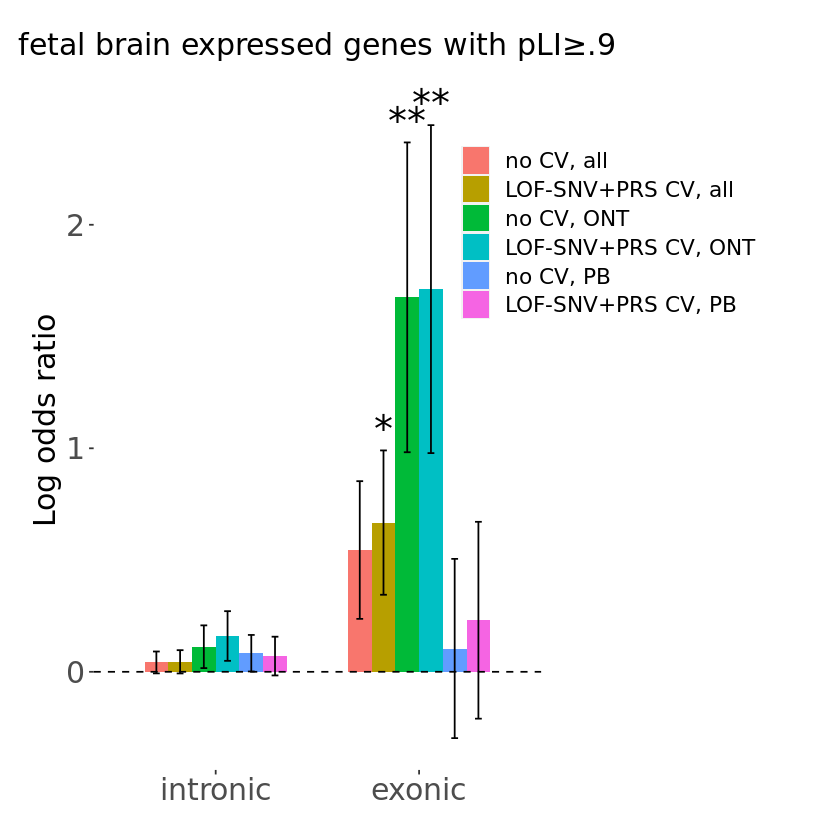

[1] "R_clogit_platform/SVs_PLI_SQ70.png"


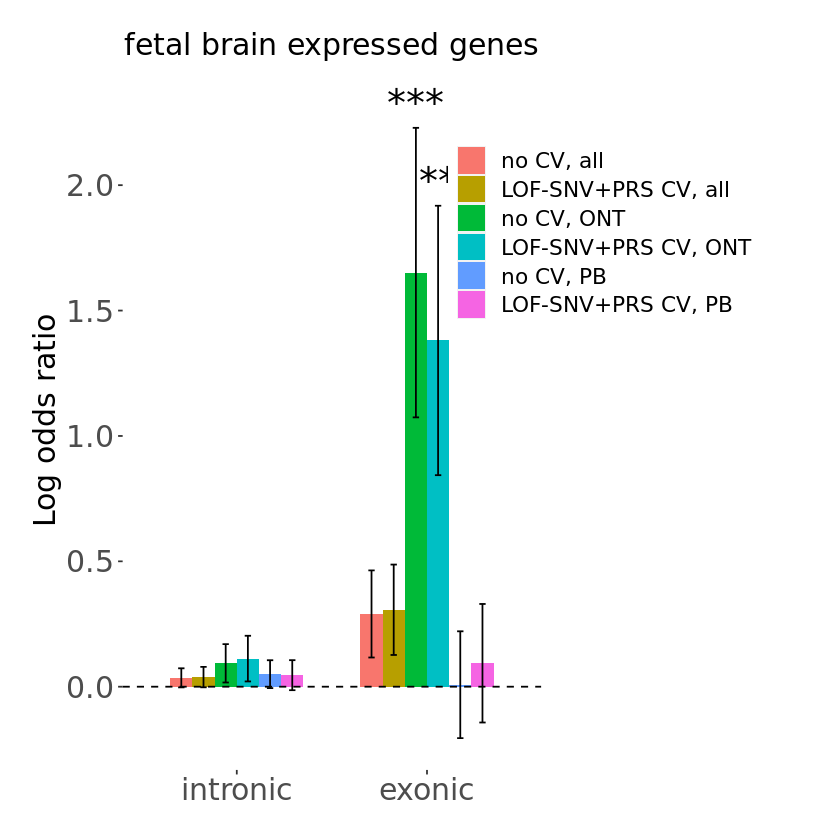

[1] "R_clogit_platform/SVs_LOWPLI_SQ70.png"


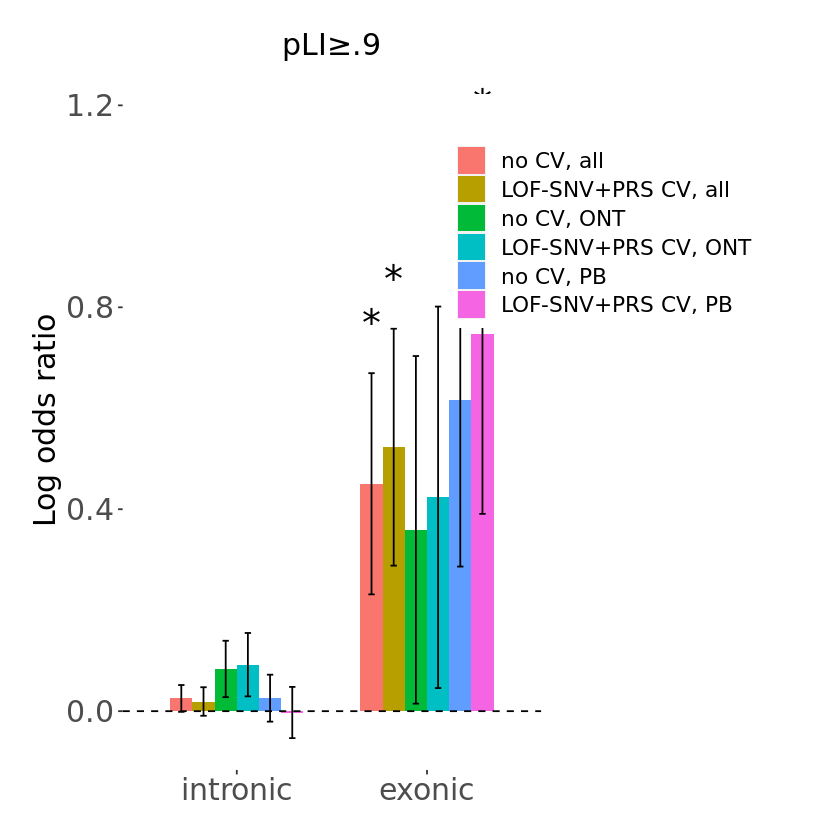

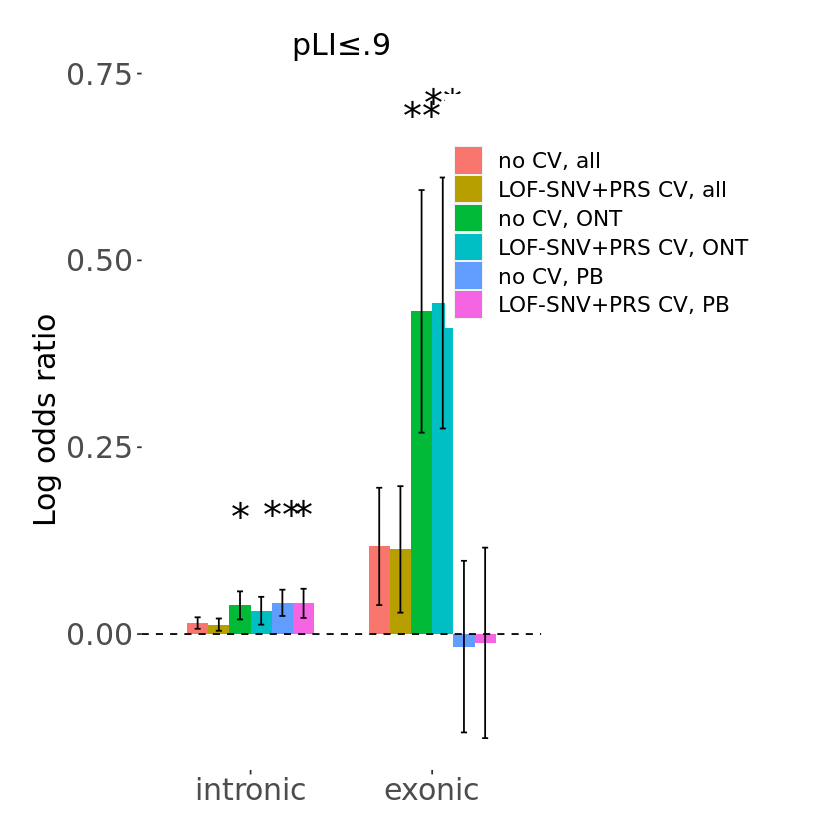

In [14]:
# plot SVs
sub_fts_labels = c('intronic', 'exonic')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4)
title_list = list(title_1, title_2, title_3, title_4)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'SVs_', fig_base, "_", flt, ".png")

    my_data_sub = my_data_all_ont_pb[my_data_all_ont_pb$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar',
                                                     'log_ORs_plus_comb_ont', 'log_ORs_minus_comb_ont', 
                                                     'ano_pval_comb_ont', 
                                                     'sum_case_con_comb_ont', 
                                                     'log_ORs_plus_ncar_ont', 'log_ORs_minus_ncar_ont', 
                                                     'ano_pval_ncar_ont', 
                                                     'sum_case_con_ncar_ont',
                                                     'log_ORs_plus_comb_pb', 'log_ORs_minus_comb_pb', 
                                                     'ano_pval_comb_pb', 
                                                     'sum_case_con_comb_pb', 
                                                     'log_ORs_plus_ncar_pb', 'log_ORs_minus_ncar_pb', 
                                                     'ano_pval_ncar_pb', 
                                                     'sum_case_con_ncar_pb'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, 
                                                                          ifelse(comb_ncar=='log_ORs_ncar', log_ORs_plus_ncar, 
                                                                                 ifelse(comb_ncar=='log_ORs_comb_ont', log_ORs_plus_comb_ont, 
                                                                                        ifelse(comb_ncar=='log_ORs_ncar_ont', log_ORs_plus_ncar_ont, 
                                                                                               ifelse(comb_ncar=='log_ORs_comb_pb', log_ORs_plus_comb_pb, 
                                                                                                      ifelse(comb_ncar=='log_ORs_ncar_pb', log_ORs_plus_ncar_pb, '.')))))))
    my_data_sub.melt[,'log_ORs_plus'] <- as.double(my_data_sub.melt[,'log_ORs_plus'])
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, 
                                                                          ifelse(comb_ncar=='log_ORs_ncar', log_ORs_minus_ncar, 
                                                                                 ifelse(comb_ncar=='log_ORs_comb_ont', log_ORs_minus_comb_ont, 
                                                                                        ifelse(comb_ncar=='log_ORs_ncar_ont', log_ORs_minus_ncar_ont, 
                                                                                              ifelse(comb_ncar=='log_ORs_comb_pb', log_ORs_minus_comb_pb, 
                                                                                                      ifelse(comb_ncar=='log_ORs_ncar_pb', log_ORs_minus_ncar_pb, '.')))))))
    my_data_sub.melt[,'log_ORs_minus'] <- as.double(my_data_sub.melt[,'log_ORs_minus'])
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, 
                                                                          ifelse(comb_ncar=='log_ORs_ncar', ano_pval_ncar, 
                                                                                 ifelse(comb_ncar=='log_ORs_comb_ont', ano_pval_comb_ont, 
                                                                                        ifelse(comb_ncar=='log_ORs_ncar_ont', ano_pval_ncar_ont, 
                                                                                              ifelse(comb_ncar=='log_ORs_comb_pb', ano_pval_comb_pb, 
                                                                                                      ifelse(comb_ncar=='log_ORs_ncar_pb', ano_pval_ncar_pb, '.')))))))
    my_data_sub.melt[,'ano_pval'] <- as.double(my_data_sub.melt[,'ano_pval'])

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print(my_data_sub.melt)

    size_txt = 18
    size_sig = 8
    ylim_min = -0.1
    ylim_max = 1.5

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(1.15, 0.8),
            legend.text = element_text(size=size_txt-5),
            legend.title = element_text(size=size_txt),
            plot.margin = margin(20, 180, 20, 20) # Add margins: top, right, bottom, left (in points)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no CV, all", "LOF-SNV+PRS CV, all", 
                                                "no CV, ONT", "LOF-SNV+PRS CV, ONT", 
                                                "no CV, PB", "LOF-SNV+PRS CV, PB"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    #if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(ylim_min, 2))}
    #base <- base + ylim(c(ylim_min, ylim_max))

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 8)
}
#my_data_sub.melt

[1] "no extra covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP2_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "count_ZS3_PLIp9_cds_SUPP2_Q" "count_ZS3_PLIp9_utr_SUPP2_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP2_Q" "count_ZS3_LOWPLI_utr_SUPP2_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q"
[1] "count_ZS3_DEV_BR_GENE_10_intron_SUPP2_Q"
[1] "count_ZS3_PLIp9_intron_SUPP2_Q"
[1] "count_ZS3_LOWPLI_intron_SUPP2_Q"
[1] "count_ZS3_FDR_ASD_cds_SUPP2_Q" "count_ZS3_FDR_ASD_utr_SUPP2_Q"
[1] "count_ZS3_FDR_ASD_intron_SUPP2_Q"
[1] "ORs:"
 [1] 1.423468 1.286472 1.224609 1.145101 1.008850 1.014211 1.010465 1.002368
 [9] 2.812456 1.118653
[1] "ORs_plus:"
 [1] 1.975896 1.565661 1.456247 1.284601 1.045011 1.039082 1.026262 1.005940
 [9] 6.015302 1.270175
[1] "ORs_minus:"
 [1] 1.0254897 1.0570674 1.0298159 1.0207499 0.9739398 0.9899361 0.9949112
 [8] 0.9988096 1.3149644 0.9852055
[1]

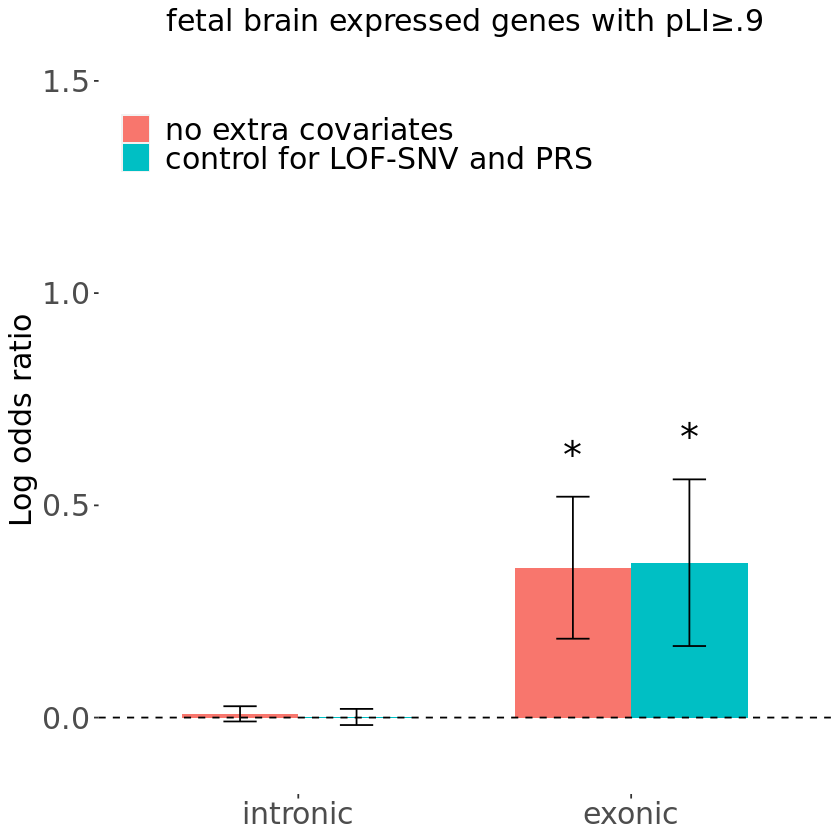

[1] "R_clogit_platform/TRs_PLI_ZS3_SUPP2_Q_ONT.png"


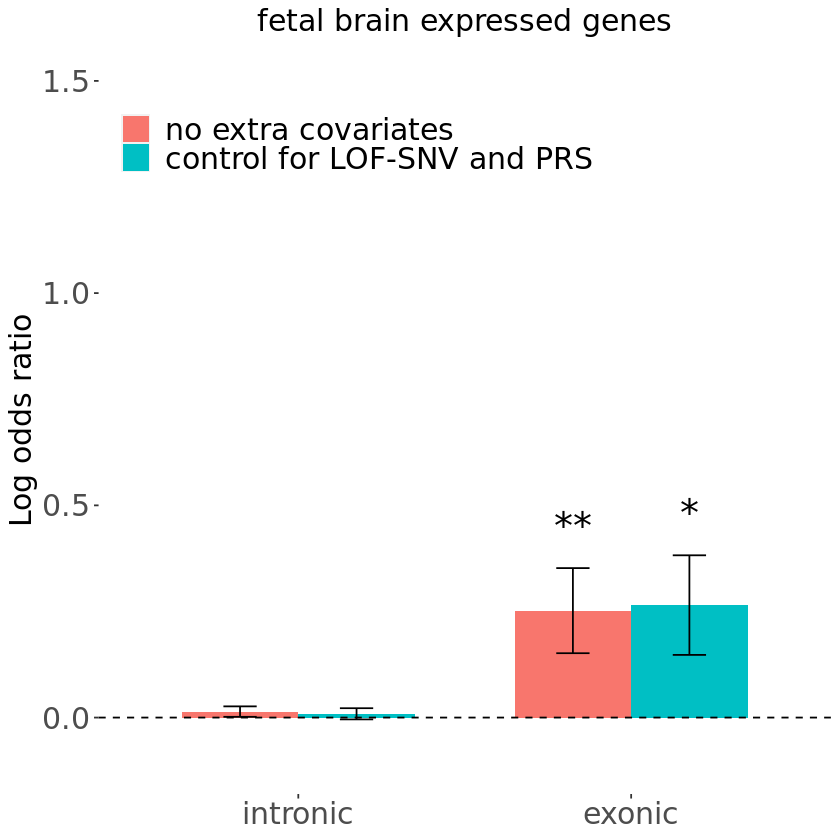

[1] "R_clogit_platform/TRs_LOWPLI_ZS3_SUPP2_Q_ONT.png"


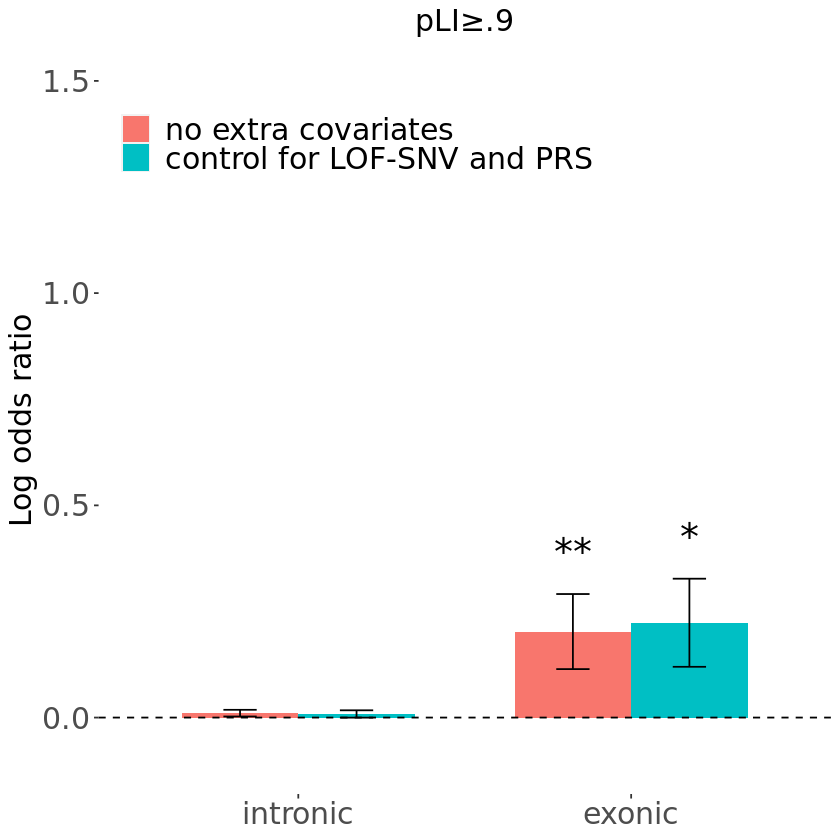

[1] "R_clogit_platform/TRs_FDR_ASD_ZS3_SUPP2_Q_ONT.png"


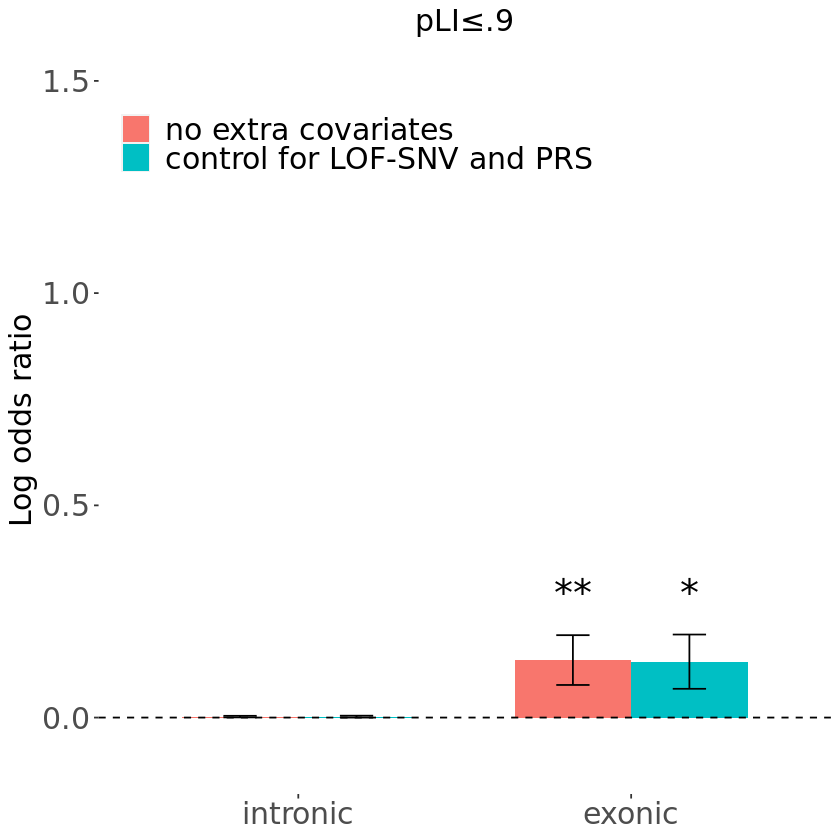

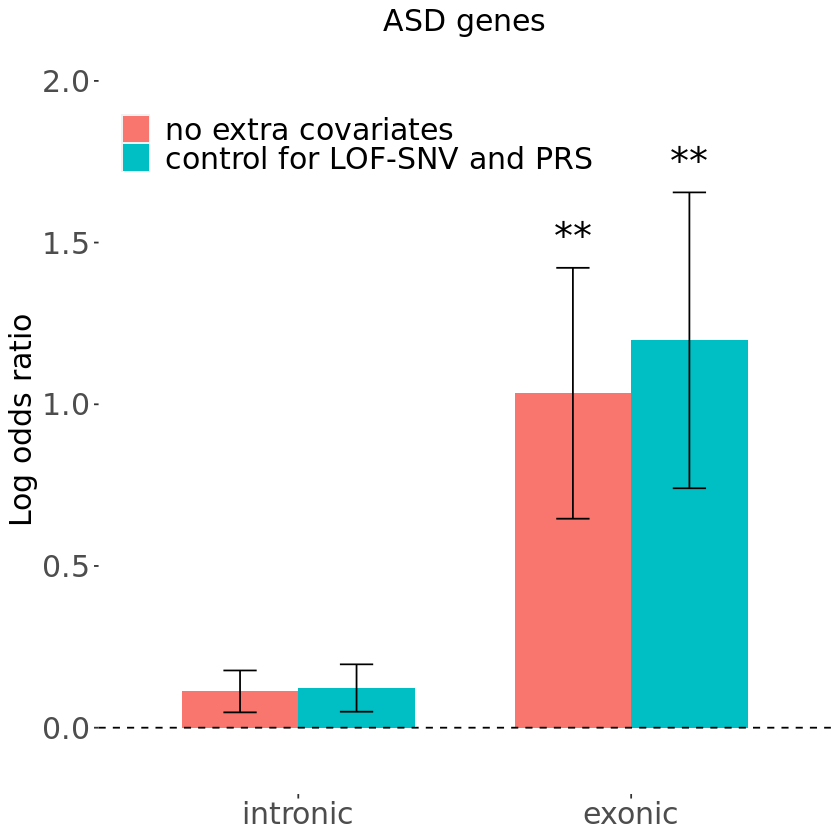

In [11]:
### TRs ONT
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

zs_thr = 3
supp_thr = 2
q_suf = '_Q'

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = trs_fts, 'fts_labels' = trs_fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

this_cols = c('fts_labels', 
              'log_ORs_comb', 'log_ORs_plus_comb', 'log_ORs_minus_comb', 'ano_pval_comb', 
              'log_ORs_ncar', 'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 'ano_pval_ncar')
# be carefull there are repeated names for the columns in the new column names. this may cause
# problems when accessing the columns
new_cols = c('Category', 
             'log OR, no extra cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value', 
             'log OR, with LOF-SNV and PRS cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value')
this_data_out = my_data[this_cols]
# formating the columns with number of digits
for (i_col in 2:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
file_out = paste0(dir_fig, 'burden_tests_table_trs.tsv')
#print(file_out)
#write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)

sub_fts_labels = c('intronic', 'exonic')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_cds + FDR_ASD_utr')
title_5 = 'ASD genes'
fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
title_list = list(title_1, title_2, title_3, title_4, title_5)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'TRs_', fig_base, '_ZS', zs_thr, '_SUPP', supp_thr, q_suf, "_ONT.png")

    my_data_sub = my_data[my_data$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print('my_data_sub.melt:')
    #print(my_data_sub.melt)

    size_txt = 18
    size_sig = 8
    ylim_min = -0.1
    ylim_max = 1.5

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(0.35, 0.9),
            legend.text = element_text(size=size_txt),
            legend.title = element_text(size=size_txt)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no extra covariates", "control for LOF-SNV and PRS"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(ylim_min, 2))}
    #base <- base + ylim(c(ylim_min, ylim_max))

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 6)
}

[1] "no extra covariates......................."
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP2_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q"
[2] "count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "count_ZS3_PLIp9_cds_SUPP2_Q" "count_ZS3_PLIp9_utr_SUPP2_Q"
[1] "count_ZS3_LOWPLI_cds_SUPP2_Q" "count_ZS3_LOWPLI_utr_SUPP2_Q"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q"
[1] "count_ZS3_DEV_BR_GENE_10_intron_SUPP2_Q"
[1] "count_ZS3_PLIp9_intron_SUPP2_Q"
[1] "count_ZS3_LOWPLI_intron_SUPP2_Q"
[1] "count_ZS3_FDR_ASD_cds_SUPP2_Q" "count_ZS3_FDR_ASD_utr_SUPP2_Q"
[1] "count_ZS3_FDR_ASD_intron_SUPP2_Q"
[1] "ORs:"
 [1] 0.3887272 0.8043421 1.1883648 0.9747098 0.8749486 0.9891947 0.9248840
 [8] 0.9841462 0.5325886 1.0402117
[1] "ORs_plus:"
 [1] 1.335242 1.264890 2.068530 1.175336 1.042788 1.099070 1.008329 1.001034
 [9] 3.136504 1.367087
[1] "ORs_minus:"
 [1] 0.11316968 0.51148039 0.68271235 0.80833014 0.73412340 0.89030375
 [7] 0.84834491 0.96754297 0.090

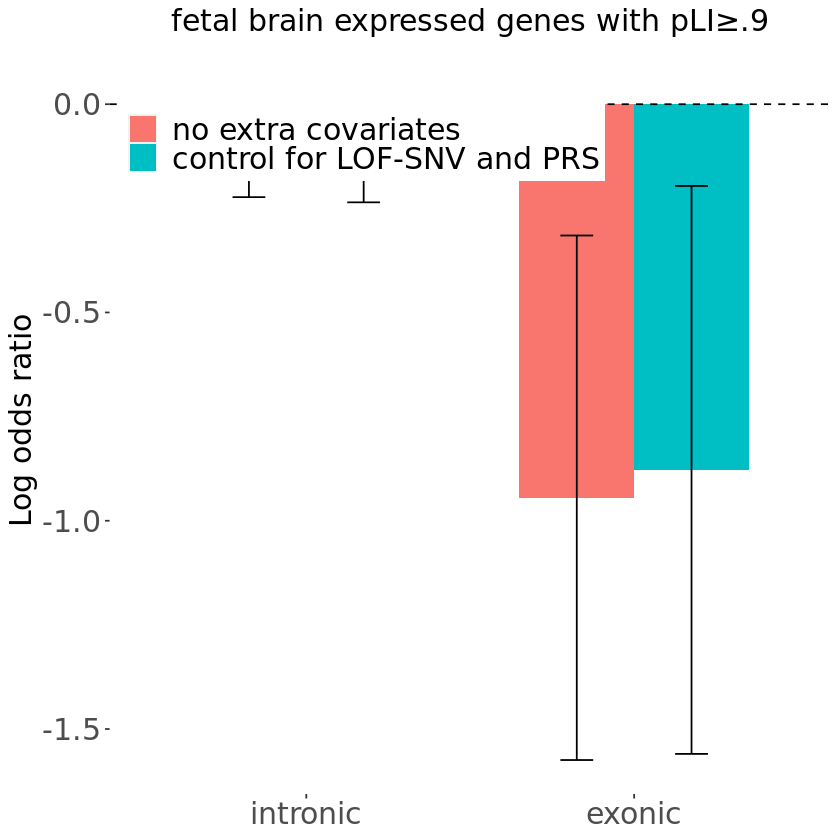

[1] "R_clogit_platform/TRs_PLI_ZS3_SUPP2_Q_PB.png"


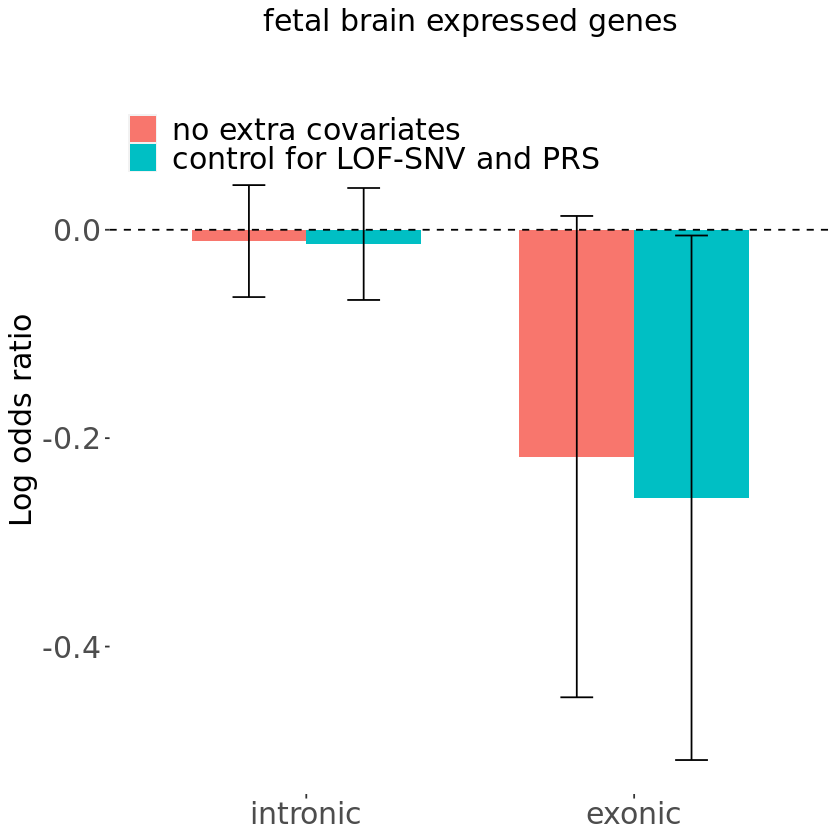

[1] "R_clogit_platform/TRs_LOWPLI_ZS3_SUPP2_Q_PB.png"


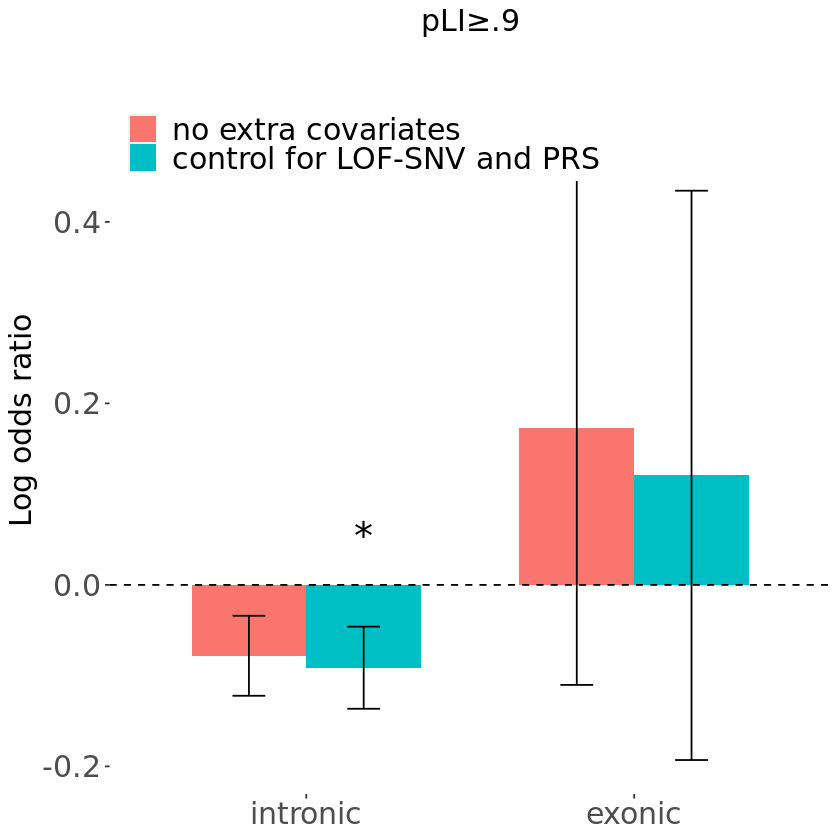

[1] "R_clogit_platform/TRs_FDR_ASD_ZS3_SUPP2_Q_PB.png"


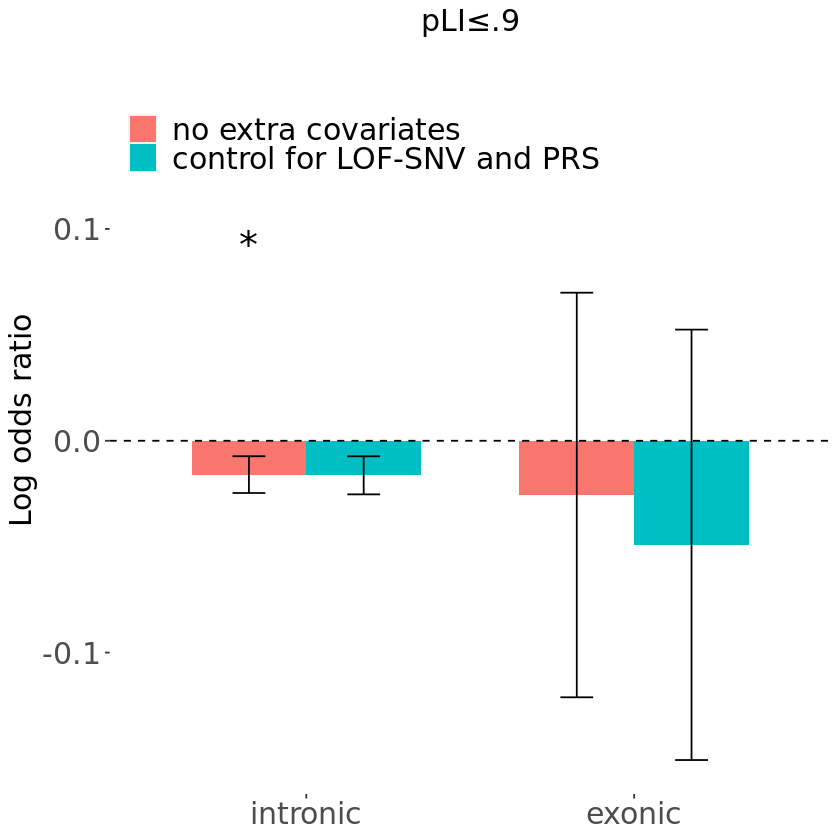

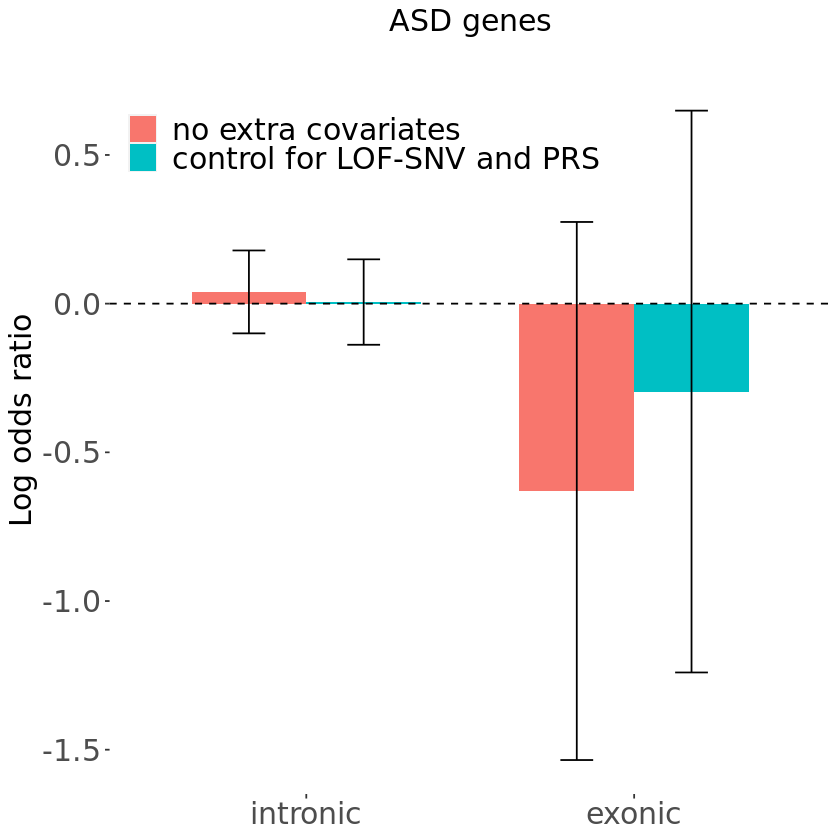

In [13]:
### TRs PB
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

zs_thr = 3
supp_thr = 2
q_suf = '_Q'

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (trs_ft in trs_fts) {
    ft_tmp = unlist(strsplit(trs_ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste('count_ZS', zs_thr, '_', ft_tmp, '_SUPP', supp_thr, q_suf, sep="") # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = trs_fts, 'fts_labels' = trs_fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

this_cols = c('fts_labels', 
              'log_ORs_comb', 'log_ORs_plus_comb', 'log_ORs_minus_comb', 'ano_pval_comb', 
              'log_ORs_ncar', 'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 'ano_pval_ncar')
# be carefull there are repeated names for the columns in the new column names. this may cause
# problems when accessing the columns
new_cols = c('Category', 
             'log OR, no extra cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value', 
             'log OR, with LOF-SNV and PRS cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value')
this_data_out = my_data[this_cols]
# formating the columns with number of digits
for (i_col in 2:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
file_out = paste0(dir_fig, 'burden_tests_table_trs.tsv')
#print(file_out)
#write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)

sub_fts_labels = c('intronic', 'exonic')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_cds + FDR_ASD_utr')
title_5 = 'ASD genes'
fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
title_list = list(title_1, title_2, title_3, title_4, title_5)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'TRs_', fig_base, '_ZS', zs_thr, '_SUPP', supp_thr, q_suf, "_PB.png")

    my_data_sub = my_data[my_data$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print('my_data_sub.melt:')
    #print(my_data_sub.melt)

    size_txt = 18
    size_sig = 8
    ylim_min = -0.1
    ylim_max = 1.5

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(0.35, 0.9),
            legend.text = element_text(size=size_txt),
            legend.title = element_text(size=size_txt)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no extra covariates", "control for LOF-SNV and PRS"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    #if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(ylim_min, 2))}
    #base <- base + ylim(c(ylim_min, ylim_max))

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 6)
}

[1] "no extra covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"
[1] "ORs:"
[1] 5.341298 5.214135 1.432107 1.540036 1.118663 1.097748 1.087150 1.039049
[1] "ORs_plus:"
[1] 20.776982 16.163436  2.812213  2.116848  1.349253  1.275365  1.212945
[8]  1.078050
[1] "ORs_minus:"
[1] 1.3731283 1.6820190 0.7292942 1.1203977 0.9274810 0.9448667 0.9744011
[8] 1.0014593
[1] "log_ORs:"
[1] 1.67546864 1.65137324 0.35914692 0.43180598 0.11213428 0.09326056 0.08355965
[8] 0.03830621
[1] "log_ORs_plus:"
[1] 2.36853091 2.22861772 0.70345169 0.59411626 0.20775705 0.16977826 0.13942388
[8] 0.05710655
[1] "log_ORs_minus:"
[1] 0.98240636 1.07412877 0.01484215 0.26949570 0.01651150 0.01674285 0.

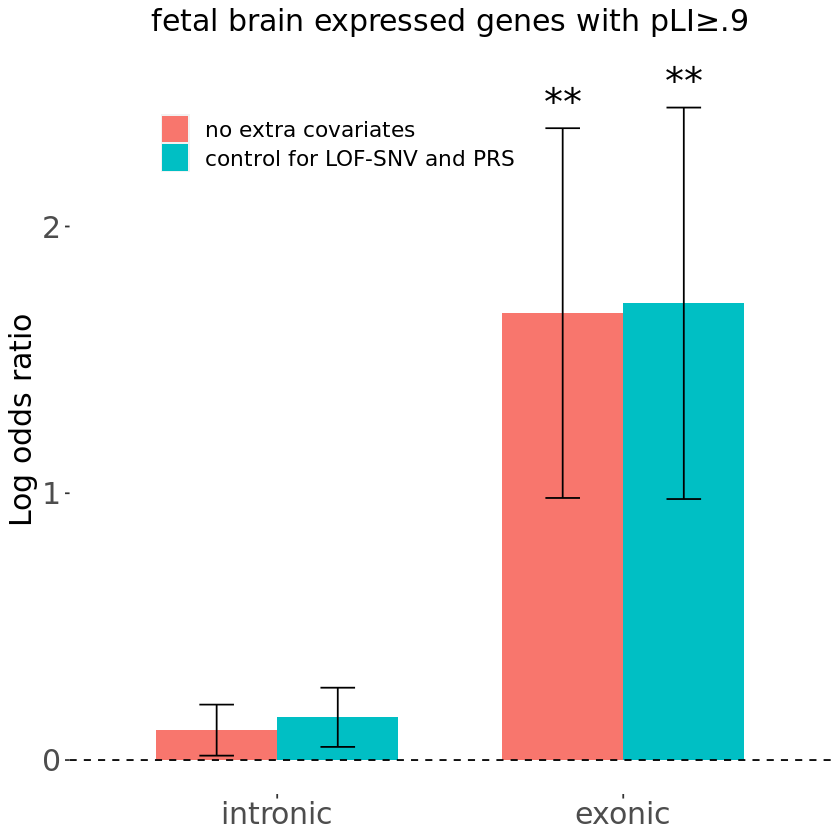

[1] "R_clogit_platform/SVs_PLI_SQ70_ONT.png"


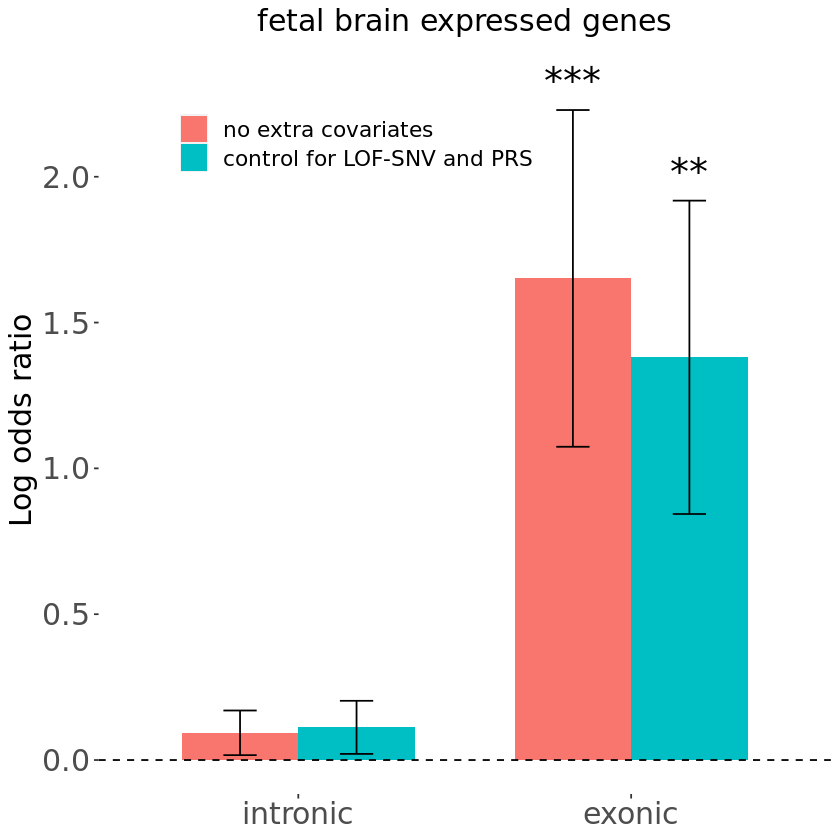

[1] "R_clogit_platform/SVs_LOWPLI_SQ70_ONT.png"


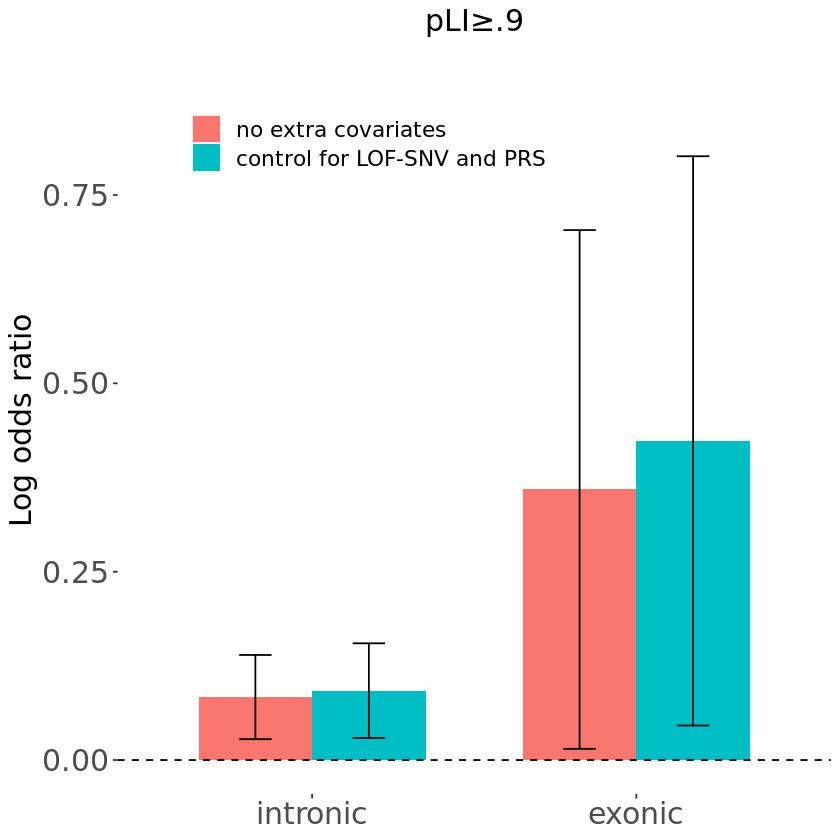

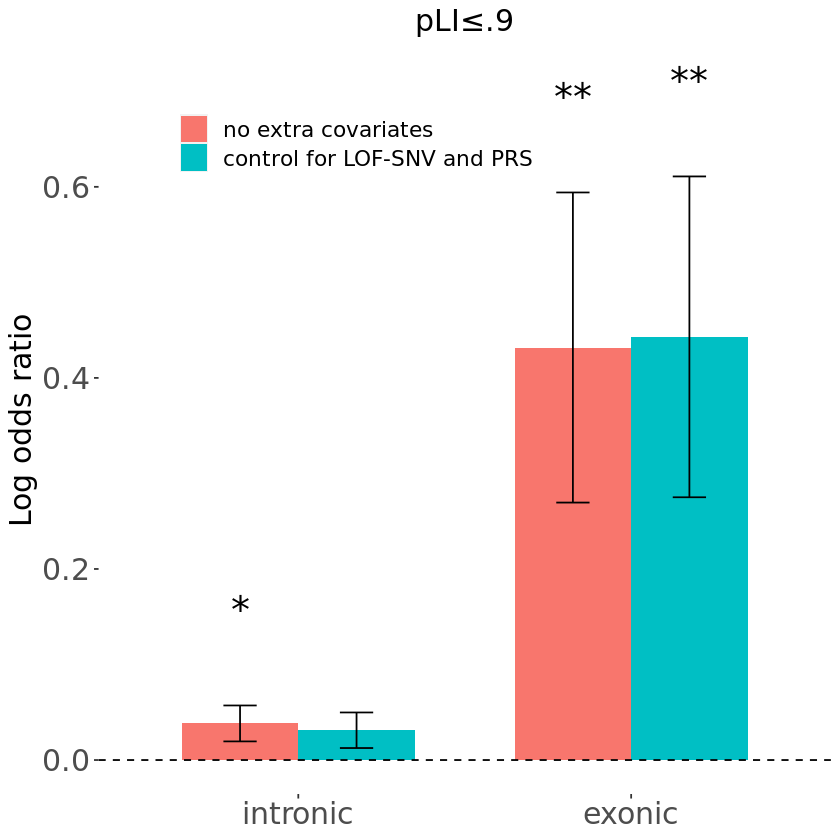

In [10]:
### SVs ONT
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# + PRS_EDU_Z + PRS_SCZ_Z  + PRS_ASD_Z
# + count_dnlof_inhlof

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_ont
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_ont[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    #  + PRS_EDU_Z + PRS_SCZ_Z + PRS_ASD_Z
    # + count_dnlof_inhlof
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

this_cols = c('fts_labels', 
              'log_ORs_comb', 'log_ORs_plus_comb', 'log_ORs_minus_comb', 'ano_pval_comb', 
              'log_ORs_ncar', 'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 'ano_pval_ncar')
# be carefull there are repeated names for the columns in the new column names. this may cause
# problems when accessing the columns
new_cols = c('Category', 
             'log OR, no extra cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value', 
             'log OR, with LOF-SNV and PRS cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value')
this_data_out = my_data[this_cols]
# formating the columns with number of digits
for (i_col in 2:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
file_out = paste0(dir_fig, 'burden_tests_table_svs.tsv')
#print(file_out)
#write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)


sub_fts_labels = c('intronic', 'exonic')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
#sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_utr', 'FDR_ASD_cds', 'LOF_FDR_ASD_cds')
#title_5 = 'ASD genes'
#fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4)
title_list = list(title_1, title_2, title_3, title_4)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'SVs_', fig_base, "_", flt, "_ONT.png")

    my_data_sub = my_data[my_data$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print('my_data_sub.melt:')
    #print(my_data_sub.melt)

    size_txt = 18
    size_sig = 8
    ylim_min = -0.1
    ylim_max = 1.5

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(0.35, 0.9),
            legend.text = element_text(size=size_txt-5),
            legend.title = element_text(size=size_txt)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no extra covariates", "control for LOF-SNV and PRS"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    #if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(-3, 3))}
    #base <- base + ylim(c(ylim_min, ylim_max))

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 6)
}

[1] "no extra covariates......................."
[1] "count_PLIp9_DEV_BR_GENE_10_cds" "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_cds" "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_cds" "count_PLIp9_utr"
[1] "count_LOWPLI_cds" "count_LOWPLI_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1] "count_LOWPLI_intron"
[1] "ORs:"
[1] 1.1098307 1.0079728 1.8509609 0.9833166 1.0867474 1.0512662 1.0260839
[8] 1.0426284
[1] "ORs_plus:"
[1] 2.435714 1.530270 3.529339 1.231488 1.275622 1.172349 1.124003 1.079134
[1] "ORs_minus:"
[1] 0.5056933 0.6639412 0.9707360 0.7851567 0.9258381 0.9426895 0.9366952
[8] 1.0073574
[1] "log_ORs:"
[1]  0.104207451  0.007941158  0.615704889 -0.016824166  0.083189191
[6]  0.049995345  0.025749521  0.041744792
[1] "log_ORs_plus:"
[1] 0.50525178 0.22095669 0.94499954 0.09799822 0.16494839 0.10561560 0.07225387
[8] 0.05930344
[1] "log_ORs_minus:"
[1] -0.296836879 -0.205074374  0.286410243 -0.131646553 

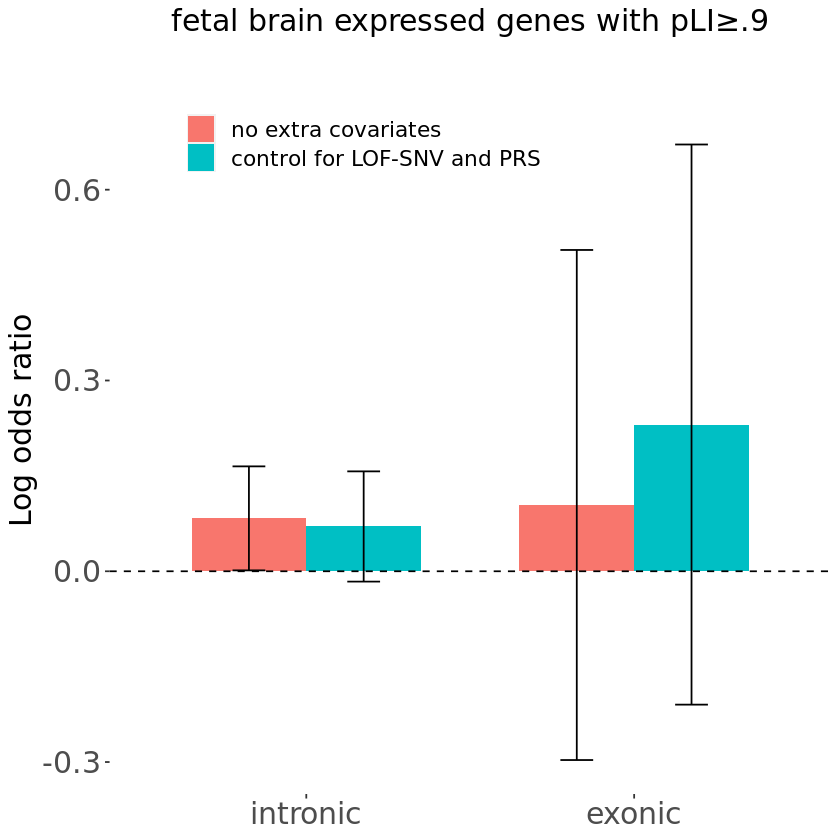

[1] "R_clogit_platform/SVs_PLI_SQ70_PB.png"


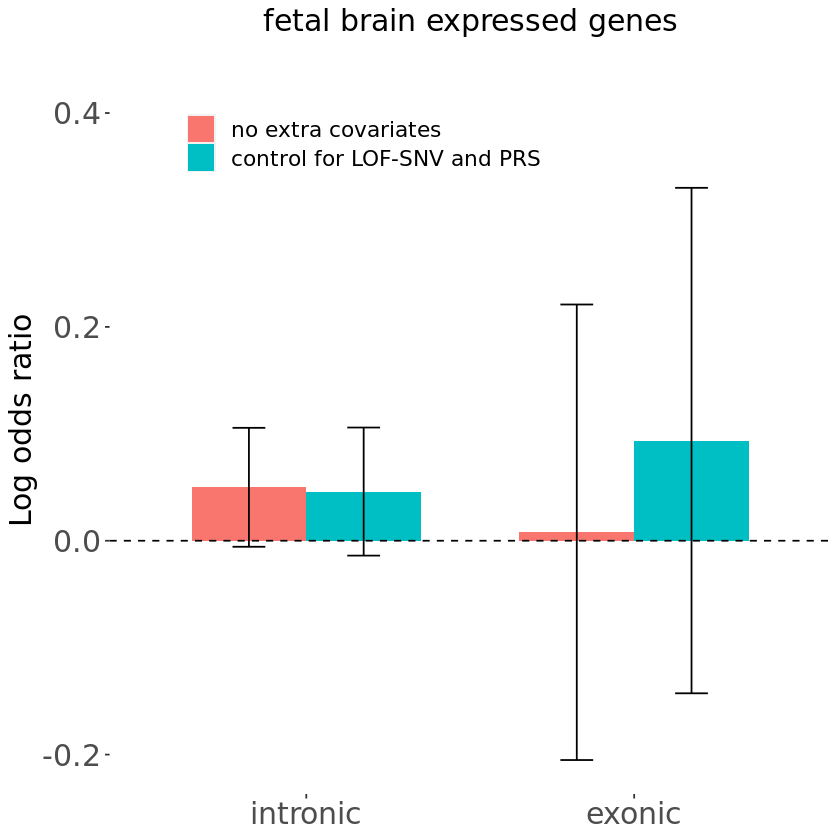

[1] "R_clogit_platform/SVs_LOWPLI_SQ70_PB.png"


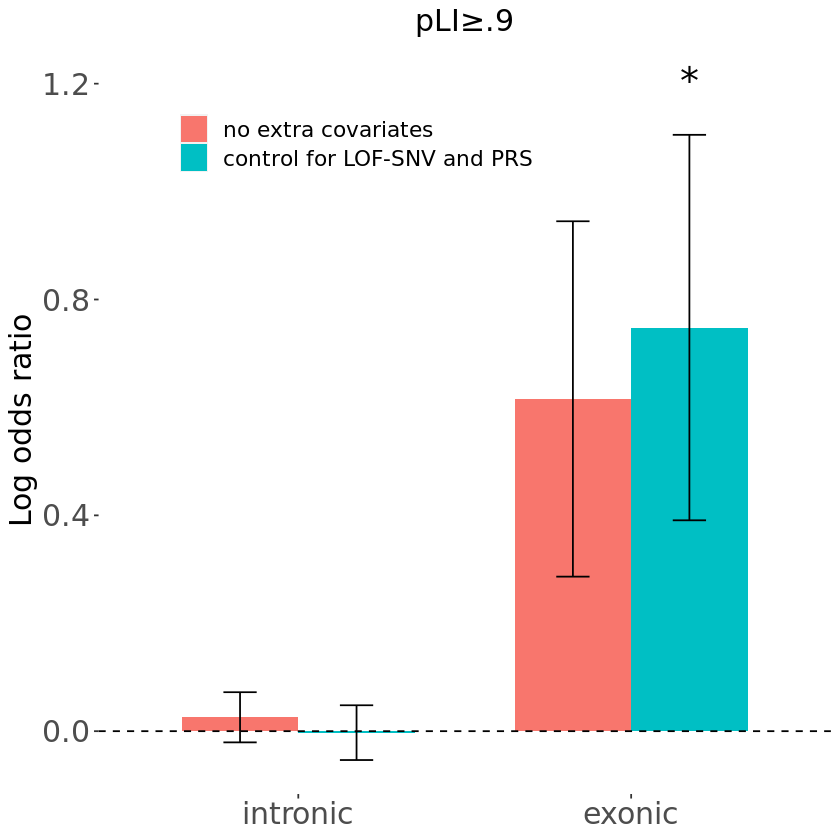

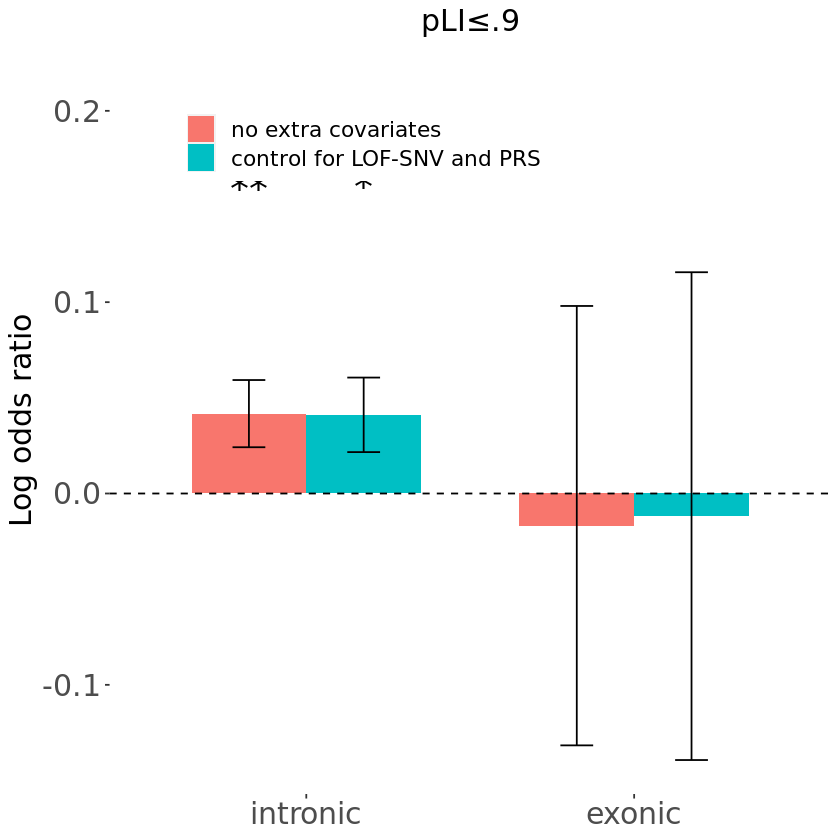

In [11]:
### SVs PB
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# + PRS_EDU_Z + PRS_SCZ_Z  + PRS_ASD_Z
# + count_dnlof_inhlof

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (ft in fts) {

    ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
    ft_tmp = str_trim(ft_tmp) # trim spaces
    ft_tmp = paste0('count_', ft_tmp) # add count_
    print(ft_tmp)
    ### make a new data frame and make a new variable called new_var
    new_df = df_main_pb
    new_df['new_var'] = 0
    for (ft_ in ft_tmp) {
        new_df['new_var'] = new_df['new_var'] + df_main_pb[ft_]
    }
    #new_df[c(ft_tmp, 'new_var')]

    #var = paste('count_', ft, sep="")
    var = 'new_var'
    ###print(var)
    
    sum_case = sum(new_df[new_df$Phenotype==1,][,var])
    sum_control = sum(new_df[new_df$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    #  + PRS_EDU_Z + PRS_SCZ_Z + PRS_ASD_Z
    # + count_dnlof_inhlof
        
    null_model <- clogit(null_formula, data = new_df)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = new_df)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

this_cols = c('fts_labels', 
              'log_ORs_comb', 'log_ORs_plus_comb', 'log_ORs_minus_comb', 'ano_pval_comb', 
              'log_ORs_ncar', 'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 'ano_pval_ncar')
# be carefull there are repeated names for the columns in the new column names. this may cause
# problems when accessing the columns
new_cols = c('Category', 
             'log OR, no extra cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value', 
             'log OR, with LOF-SNV and PRS cov.', 'upper 95% CI', 'lower 95% CI', 'ANOVA p-value')
this_data_out = my_data[this_cols]
# formating the columns with number of digits
for (i_col in 2:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
file_out = paste0(dir_fig, 'burden_tests_table_svs.tsv')
#print(file_out)
#write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)


sub_fts_labels = c('intronic', 'exonic')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
#sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_utr', 'FDR_ASD_cds', 'LOF_FDR_ASD_cds')
#title_5 = 'ASD genes'
#fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4)
title_list = list(title_1, title_2, title_3, title_4)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'SVs_', fig_base, "_", flt, "_PB.png")

    my_data_sub = my_data[my_data$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print('my_data_sub.melt:')
    #print(my_data_sub.melt)

    size_txt = 18
    size_sig = 8
    ylim_min = -0.1
    ylim_max = 1.5

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(0.35, 0.9),
            legend.text = element_text(size=size_txt-5),
            legend.title = element_text(size=size_txt)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no extra covariates", "control for LOF-SNV and PRS"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    #if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(-3, 3))}
    #base <- base + ylim(c(ylim_min, ylim_max))

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 6)
}